>**本章主要介绍了lasso法，岭（ridge）回归，弹性（elastic net）网络**

---

## 一、回归预测房价
数据集 主要包含了人口统计信息和地理属性，目标是预测特定区域房价的均值，当然，这个数据在scikit中是内置的。

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

boston是一个合成的对象，我们只对其中的`boston.data`和`boston.target`感兴趣。

Residual: 4.67950630064


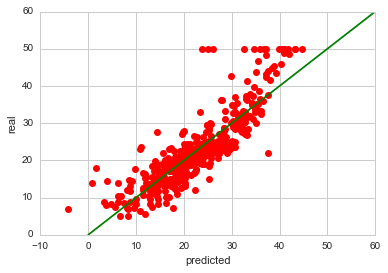

In [2]:
import numpy as np
from sklearn.datasets import load_boston
import pylab as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

boston = load_boston()
x = np.array([np.concatenate((v,[1])) for v in boston.data])  #
y = boston.target
s,total_error,_,_ = np.linalg.lstsq(x,y)

rmse = np.sqrt(total_error[0]/len(x))
print('Residual: {}'.format(rmse))

plt.plot(np.dot(x,s), boston.target,'ro')
plt.plot([0,60],[0,60], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


Residual: 7.64268509309


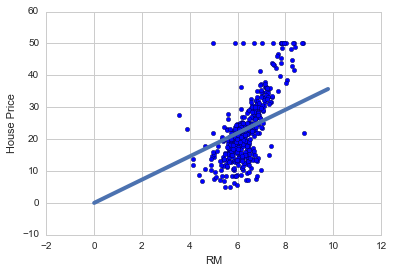

In [3]:
import numpy as np
from sklearn.datasets import load_boston
import pylab as plt
#from mpltools import style
#style.use('ggplot')

boston = load_boston()
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel("RM")
plt.ylabel("House Price")


x = boston.data[:,5]
x = np.array([[v] for v in x])
y = boston.target

slope,res,_,_ = np.linalg.lstsq(x,y)
plt.plot([0,boston.data[:,5].max()+1],[0,slope*(boston.data[:,5].max()+1)], '-', lw=4)
plt.savefig('Figure1.png',dpi=150)

rmse = np.sqrt(res[0]/len(x))
print('Residual: {}'.format(rmse))


Residual: 6.60307138922


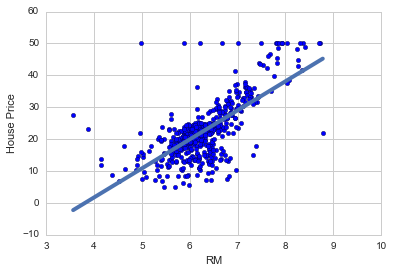

In [4]:
import numpy as np
from sklearn.datasets import load_boston
import pylab as plt
#from mpltools import style
#style.use('ggplot')

boston = load_boston()
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel("RM")
plt.ylabel("House Price")


x = boston.data[:,5]
xmin = x.min()
xmax = x.max()
x = np.array([[v,1] for v in x])
y = boston.target

(slope,bias),res,_,_ = np.linalg.lstsq(x,y)
plt.plot([xmin,xmax],[slope*xmin + bias, slope*xmax + bias], '-', lw=4)
plt.savefig('Figure2.png',dpi=150)

rmse = np.sqrt(res[0]/len(x))
print('Residual: {}'.format(rmse))
